<a href="https://colab.research.google.com/github/evitts1989/DS-Unit-2-Applied-Modeling/blob/master/Corey_Evitts_DS_Sprint_Challenge_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍕

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._

## Part 1: Preprocessing

> You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

In [8]:
test.shape

(17306, 17)

(17306, 17)

In [9]:
train.shape

(51916, 17)

(51916, 17)

In [10]:
test.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1


In [11]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


*Examining Facility Type as a relevant feature to re-engineer. Looks like it could be a categorical value.*

In [12]:
y = train['Facility Type']
print(y.nunique()) #this finds number of unique values
print(y.unique()) #this generates the contents of the array of unique values

329
['Restaurant' 'Grocery Store' 'School' 'Long Term Care' 'Liquor'
 'Daycare Above and Under 2 Years' "Children's Services Facility"
 'Catering' 'Daycare Night' 'CHURCH' 'GAS STATION/STORE'
 'Daycare (2 - 6 Years)' 'Mobile Food Preparer' 'Golden Diner' 'TAVERN'
 'ICE CREAM SHOP' 'Banquet Hall' 'coffee shop' 'Bakery'
 'SLAUGHTER HOUSE/ GROCERY' 'RESTAURANT/GROCERY STORE'
 'Shared Kitchen User (Long Term)' 'Daycare (Under 2 Years)' 'Wholesale'
 'Mobile Food Dispenser' nan 'Daycare Combo 1586' 'Hospital' 'STORE'
 'Airport Lounge' 'LIVE POULTRY' 'tavern' 'REPACKAGING PLANT'
 'Daycare (2 Years)' 'Mobile Prepared Food Vendor' 'CHURCH KITCHEN'
 'GROCERY/GAS STATION' 'GAS STATION STORE' 'BAR' 'Navy Pier Kiosk'
 'STADIUM' 'Special Event' 'KIOSK' 'RETAIL STORE' 'CATERING/CAFE'
 'GROCERY/RESTAURANT' 'MOVIE THEATRE' 'Shared Kitchen' 'DAYCARE'
 'TEA BREWING' 'Long-Term Care' "1023-CHILDREN'S SERVICES FACILITY"
 'convenience store' 'GAS STATION' 'Private School' 'COMMISSARY'
 'COFFEE KIOSK' 'CONVE

In [13]:
train['Facility Type'].isnull().sum()

224

In [14]:
train.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

*Dropping rows which contain Nan in 'Facility Type'*

In [0]:
train = train[train['Facility Type'].notnull()]

In [0]:
columns = ['City','AKA Name','License #','State','Zip','Violations','Latitude','Longitude','Location']

*Re-engineering the 'Facility Type' column. This was done manually. probably should have written a function here. may attempt to if i have enough time*

In [0]:
train['Facility Type'] = train['Facility Type'].str.lower()

daycare = train['Facility Type'].str.contains('daycare')
store = train['Facility Type'].str.contains('store')
restuarant = train['Facility Type'].str.contains('restuarant')
grocery = train['Facility Type'].str.contains('grocery')
cafeteria = train['Facility Type'].str.contains('cafeteria')
bar = train['Facility Type'].str.contains('bar')
coffee = train['Facility Type'].str.contains('coffee')
assisted = train['Facility Type'].str.contains('assist')
shop = train['Facility Type'].str.contains('shop')
care = train['Facility Type'].str.contains('care')
nursing = train['Facility Type'].str.contains('nursing')
club = train['Facility Type'].str.contains('club')
kitchen = train['Facility Type'].str.contains('kitchen')
cafe = train['Facility Type'].str.contains('cafe')
school = train['Facility Type'].str.contains('school')
dcare = train['Facility Type'].str.contains('day care')
hall = train['Facility Type'].str.contains('hall')
venue = train['Facility Type'].str.contains('venue')
diner = train['Facility Type'].str.contains('diner')
bakery = train['Facility Type'].str.contains('bakery')
rooftop = train['Facility Type'].str.contains('rooftop')
gasstation = train['Facility Type'].str.contains('gas station')

train.loc[daycare, 'Facility Type'] = 'Daycare'
train.loc[store, 'Facility Type'] = 'Store'
train.loc[restuarant, 'Facility Type'] = 'Restuarant'
train.loc[grocery, 'Facility Type'] = 'Grocery'
train.loc[cafeteria, 'Facility Type'] = 'Cafeteria'
train.loc[bar, 'Facility Type'] = 'Bar'
train.loc[coffee, 'Facility Type'] = 'Coffee'
train.loc[assisted, 'Facility Type'] = 'Assisted Living'
train.loc[shop, 'Facility Type'] = 'Shop'
train.loc[nursing, 'Facility Type'] = 'Assisted Living'
train.loc[club, 'Facility Type'] = 'Club'
train.loc[kitchen, 'Facility Type'] = 'Kitchen'
train.loc[cafe, 'Facility Type'] = 'Cafe'
train.loc[school, 'Facility Type'] = 'School'
train.loc[dcare, 'Facility Type'] = 'Daycare'
train.loc[hall, 'Facility Type'] = 'Venue'
train.loc[venue, 'Facility Type'] = 'Venue'
train.loc[diner, 'Facility Type'] = 'Diner'
train.loc[bakery, 'Facility Type'] = 'Bakery'
train.loc[rooftop, 'Facility Type'] = 'Rooftop'
train.loc[gasstation, 'Facility Type'] = 'Gas Station'

In [0]:
facilities = ['Gas Station','Rooftop','Bakery','Diner','Venue','Daycare',
             'School','Cafe','Kitchen','Club','Assisted Living','Shop',
             'Coffee','Bar','Cafeteria','Grocery','Restuarant','Store',
             'Daycare']

*Selecting only those rows in train which have been standardized through my re-engineering*

In [0]:
train = train[train['Facility Type'].isin(facilities)]

In [20]:
train['Facility Type'].value_counts()

Grocery            6994
School             3937
Daycare            1816
Bakery              861
Diner               162
Kitchen             127
Gas Station          83
Store                59
Venue                52
Cafe                 39
Bar                  37
Shop                 27
Rooftop              19
Assisted Living      13
Coffee                9
Club                  4
Name: Facility Type, dtype: int64

In [21]:
train.shape

(14239, 17)

*Original shape of train was (51916, 16). Now it's (14239, 16). i belive I will still have the adequate data to spit out a model pretty efficiently*

In [22]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0
10,1516695,PETE'S MARKET,PETE'S MARKET,36823.0,Grocery,Risk 1 (High),5724 S KEDZIE AVE,CHICAGO,IL,60629.0,2015-11-30T00:00:00,Complaint,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.789113,-87.703580,"{'longitude': '-87.70357972660756', 'latitude'...",0
12,1982990,MARK TWAIN ELEMENTARY,MARK TWAIN ELEMENTARY,25661.0,School,Risk 1 (High),5134 S LOTUS,CHICAGO,IL,60638.0,2017-02-10T00:00:00,Canvass Re-Inspection,NaN,41.799052,-87.758965,"{'longitude': '-87.75896524463428', 'latitude'...",0
29,519292,CITGO GAS,CITGO GAS,2093475.0,Grocery,Risk 2 (Medium),4064-4070 N CLARK ST,CHICAGO,IL,60613.0,2011-11-01T00:00:00,Complaint,NaN,41.956094,-87.663477,"{'longitude': '-87.66347696035288', 'latitude'...",0


## Part 2: Modeling

> **Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.
>
> Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['Facility Type'], random_state=42)

In [25]:
print(train.shape, val.shape, test.shape)

(11391, 17) (2848, 17) (17306, 17)


In [0]:
target = 'Fail'
features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [27]:
y_train.value_counts(normalize=True)

0    0.735142
1    0.264858
Name: Fail, dtype: float64

*Baseline is the 74% of the time food handling entities pass their inspections.*

In [28]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 1.0
Validation Accuracy 0.7212078651685393


*Validation accuracy of the model is less than random throws of the dice.*

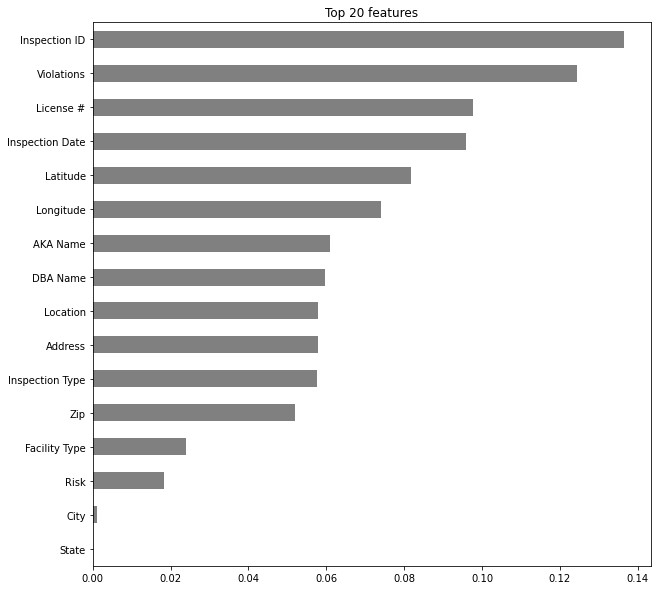

In [29]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [30]:
column  = 'Violations'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without Violations: 0.7271769662921348
Validation Accuracy with Violations: 0.7212078651685393
Drop-Column Importance for Violations: -0.005969101123595499


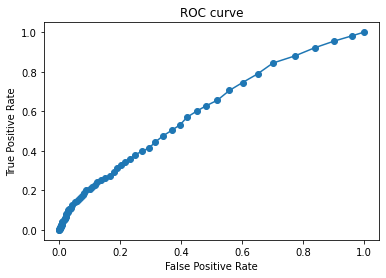

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for the last class
roc_auc_score(y_val, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})


import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

*Curve is barely above the center. Shows some value in the ROC curve but not alot. the model definitley requires further work.*

## Part 3: Visualization

> Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:
>
> - Permutation Importances
> - Partial Dependence Plot, 1 feature isolation
> - Partial Dependence Plot, 2 features interaction
> - Shapley Values

In [32]:
pip install eli5

In [33]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

# 1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [35]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

AKA Name          -0.002879
Address           -0.002107
DBA Name          -0.001404
Latitude          -0.001334
Location          -0.001264
Inspection ID     -0.000843
Risk              -0.000632
Inspection Date   -0.000632
Violations        -0.000211
City               0.000000
State              0.000000
Longitude          0.000702
Facility Type      0.001124
Zip                0.001264
License #          0.002388
Inspection Type    0.004635
dtype: float64

In [39]:
eli5.show_weights(
    permuter, 
    top=None, 
# show permutation importances for all features
    feature_names=feature_names)
# must be a list

Weight,Feature
0.0046 ± 0.0034,Inspection Type
0.0024 ± 0.0041,License #
0.0013 ± 0.0035,Zip
0.0011 ± 0.0012,Facility Type
0.0007 ± 0.0026,Longitude
0 ± 0.0000,State
0 ± 0.0000,City
-0.0002 ± 0.0010,Violations
-0.0006 ± 0.0011,Inspection Date
-0.0006 ± 0.0040,Risk


From what I can tell, none of the features really are that important. Inspection Type is the closest to having some importance but it's only just at the 50% threshold from the weight. More detailed work could most likely produce a much better model.

In [40]:
pip install PDPbox

In [41]:
pip install xgboost

In [42]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Gradient Boosting R^2 -0.055187766442629904


In [0]:
import matplotlib.pyplot as plt

In [44]:
features

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Violations', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'License #'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5c2160cfd0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5bdef89f60>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


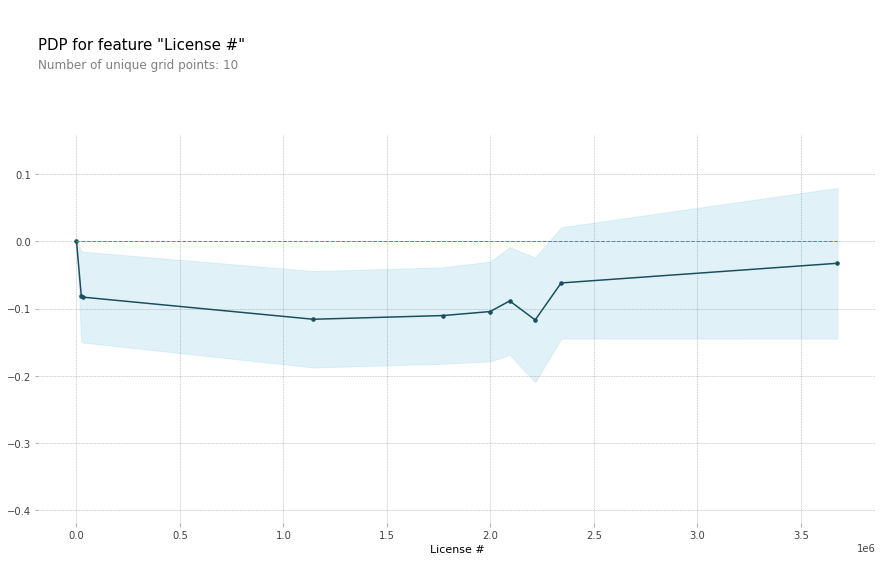

In [46]:
pdp_plot(isolated, feature_name=feature)